## Introduction to the Proposal

The broad topic that I will be addressing is:
"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

The specific question that I will be asking is:
"Can played hours and age predict whether a player subscribes to the newsletter in players.csv?

In order to answer this question we will need the players.csv dataset, therefore all future wrangling will be exclusively done on that set. More specifically, we will need the variables Age, played_hours to predict the value of the variable subscribe. Because the explanatory variables are quantitative, we will not need to convert them to numeric values for future applications into predictive models. However, we will need to filter out any N/A values, and visualize the relationship between the two variables with a graph. I will also visualize the distribution of the two quantitative variables in separate histograms, and the number of people in the dataset that are subscribed and those that are not.

### Methods



In [2]:
# Code that lets me work with tidyverse and other related libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read_csv("players.csv")


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Description: players.csv
In the players dataset, there are 196 observations (which means 196 unique players), and 7 variables in total:

- experience (character) - The players experience in the game (amateur, pro, veteran, regular, beginner)

- subscribe (logical) - Indicates whether player is subscribed to a premium, by “TRUE” or “FALSE”.


- hashedEmail (character) - An encoded email address used as anonymous identification for the player

- played_hours (double) - total number of hours the player has spent on the game

- name (character) - The players display name in-game

- gender (character) - The players gender (Male, Female, Non-binary, Prefer not to say, Agender,
Two-spirited, Other) 

- Age (double) - The players age in years, a continuous variable


In [4]:
sessions <- read_csv("sessions.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Description: sessions.csv

In the sessions dataset that we will not use, there are 1535 observations and 5 variables in total:

- hashedEmail (character) - An encoded email address used as anonymous identification for the player

- start_time (character) - Date and time a player started their individual session in the server

- end_time (character) - Date and time a player ended their session in the server

- original_start_time (double) - Start time in milliseconds

- original_end_time (double) - End time in milliseconds

In [9]:
# summarizing the mean values of the quantitative variables in the players.csv data table
player_mean_values <- players |> summarize(avg_hours_played = mean(played_hours, na.rm = TRUE), avg_age = mean(Age, na.rm = TRUE))
# i put the summarized values in the table below for clarity you're welcome guys :thumbsup:

## Data Description: Summary Statistics for players.csv

|Average Hours Played | Average Age (years)|
|:--------------------|:------------|
|5.85                 |21.14

## Potential Issues with players.csv/sessions.csv

##### players.csv
- subscribe - We are not able to perform numerical calculations on logical values which would limit what we can do with the column.

- hashedEmail - There are visibility issues with these encoded email addresses.

- played_hours - There are a lot of players who put zero playtime into the game which could skew the data in certain calculations.

- gender - There are possible missing values, or those who selected Prefer not to say.

- Age - There are NA values in this column that should be removed in certain calculations such as summary statistics

##### sessions.csv
- Potential addition to the dataframe - Having a new column describing the duration of the session may be useful for future analysis.

- hashedEmail - There are visibility issues with these encoded email addresses.

- original_start_time/original_end_time - There are visibility issues with the exponents involved in the numbers. Turning the milliseconds into seconds could fix those issues.

- start_time/end_time - The values inside the columns could be even tidier by splitting the date and the time into two separate columns.



### Wrangling the players.csv dataset for future analysis/visualization

In the code cell below the players.csv file was filtered for any potential N/A values in the columns Age and played_hours.

In [14]:
player_data <- players |> filter(!is.na(Age), !is.na(played_hours))
player_data


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


### Visualizations

Below I have created four visualizations: one scatterplot, two histograms, and a bar plot.

1) Distribution of Hours Played in a Minecraft Server
We can see that the vast majority of players that registered into the server did not play in it at all. This is relevant as it is possible that the ones who did not log any hours were mostly not subscribed. This topic is further discussed under the 4th graph.

2) Distribution of Ages
We can see that the majority of players that registered into the server is in the 15-35 range, with a couple of outliers around the 40s range.

3) Comparing the Number of Players Subscribed vs Not Subscribed
We can see that the majority of players (~140) have subscribed to the newsletter while ~50 people have not.

4) Relationship between Age, Played Hours, and Subscription
From this graph, we can see not correlation between age and played hours. However, there is a spike at the 15-24 range, suggesting that the majority of players who played in the server a lot are around that age range. Moreover, while there does not seem to be a correlation between age, played hours, and whether or not one is subscribed, one thing of note is that the spike at the 15-24 range consists exclusively of subscribers.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


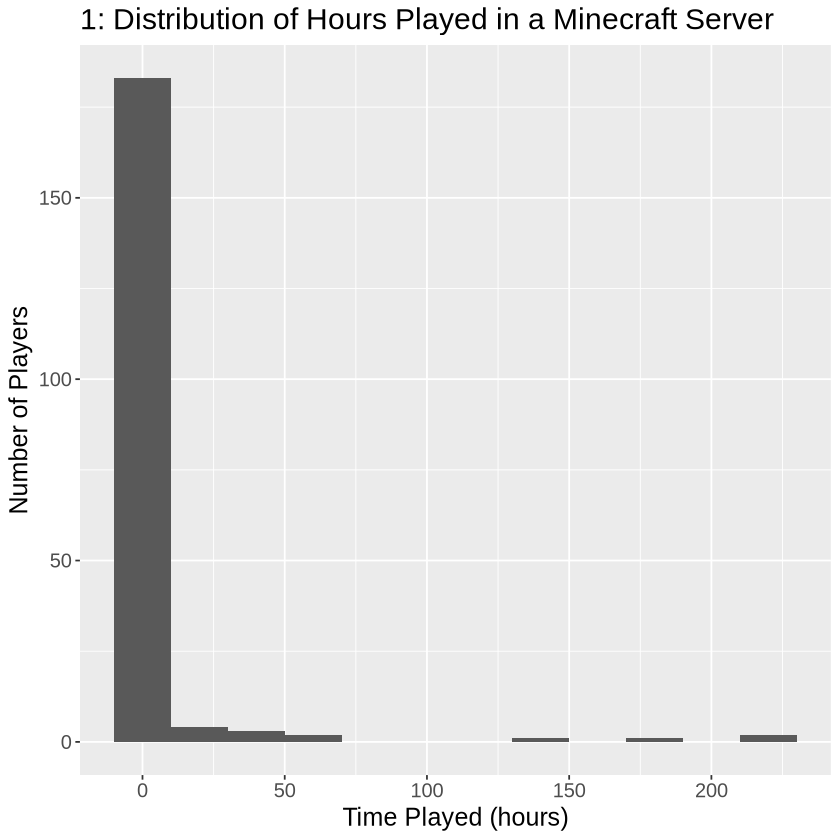

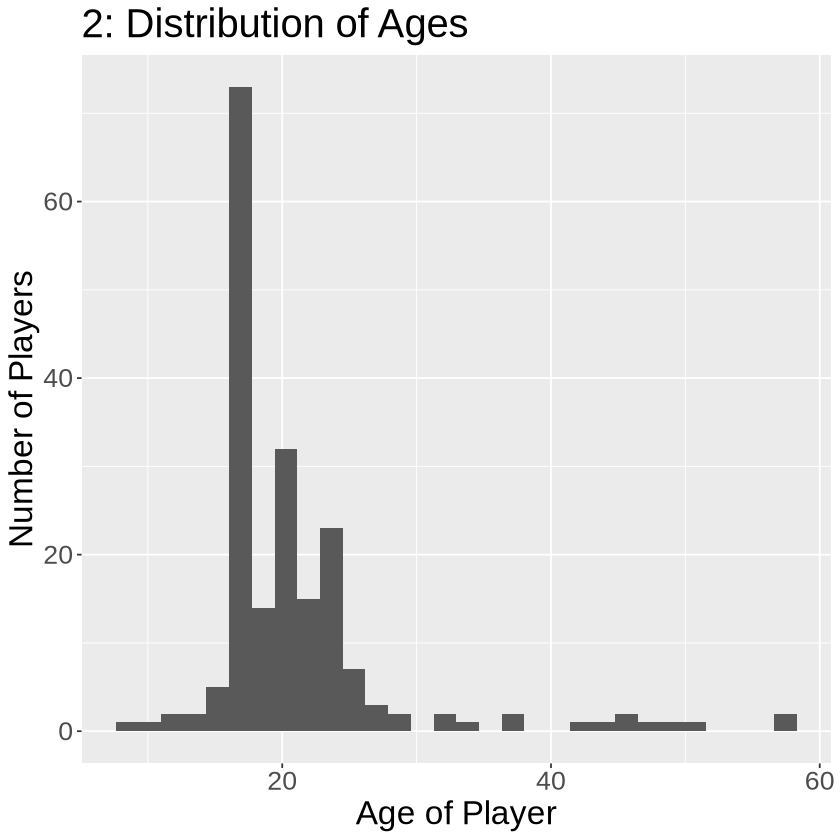

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


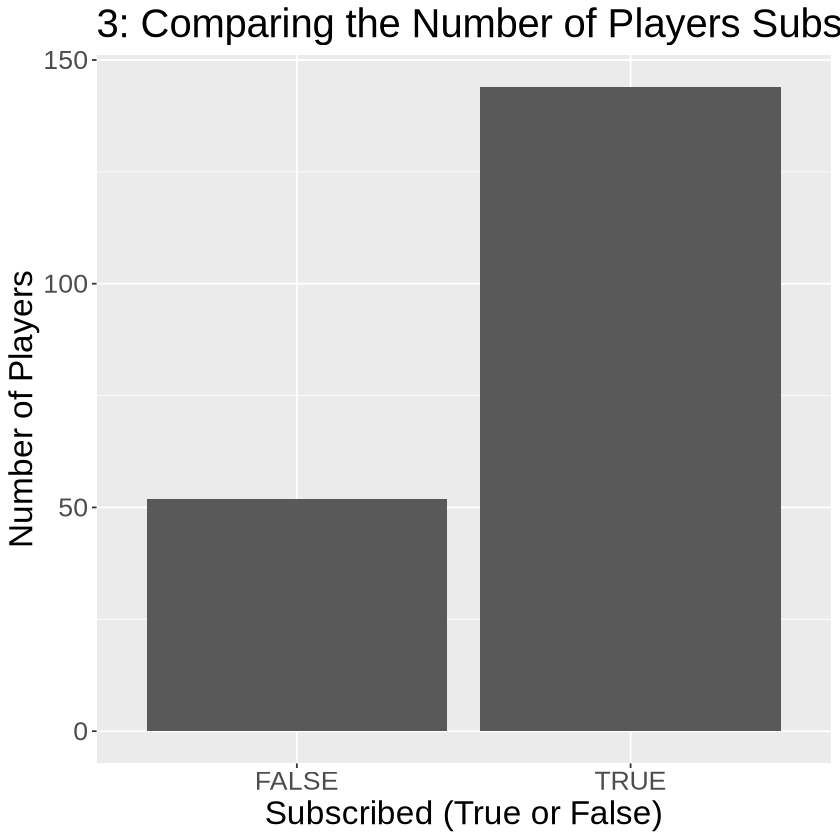

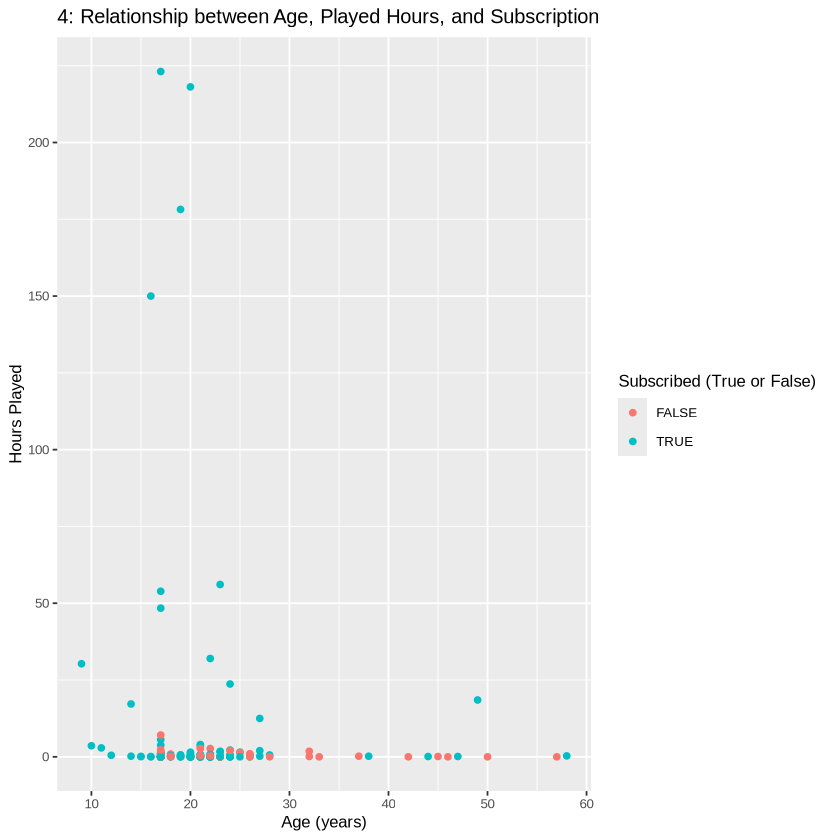

In [25]:

# 1. visualizing the distribution of hours played for all players
hours_played_viz <- players |> ggplot(aes(x = played_hours)) + geom_histogram(binwidth = 20) + labs(x = "Time Played (hours)", y = "Number of Players") + 
ggtitle("1: Distribution of Hours Played in a Minecraft Server") + theme(text = element_text(size = 15))

# 2. visualizing the distribution of the age of all players
age_viz <- players |> ggplot(aes(x = Age)) + geom_histogram() + labs(x = "Age of Player", y = "Number of Players") + 
ggtitle("2: Distribution of Ages") + theme(text = element_text(size = 20))

# 3. visualizting how many players are subscribed and not subscribed
sub_viz <- players |> ggplot(aes(x = subscribe)) + geom_bar() + labs(x = "Subscribed (True or False)", y = "Number of Players") + 
ggtitle("3: Comparing the Number of Players Subscribed vs Not Subscribed") + theme(text = element_text(size = 20))


# 4. visualizing the relationship between age and played hours
scatterplot_two_explanatory_variables <- players |> ggplot(aes(x = Age, y = played_hours, color = subscribe )) + 
geom_point() + labs(x = "Age (years)", y = "Hours Played", color = "Subscribed (True or False)") + 
ggtitle("4: Relationship between Age, Played Hours, and Subscription") + theme(text = element_text(size = 10))


hours_played_viz
age_viz
sub_viz
scatterplot_two_explanatory_variables

